In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil
import random
import os

In [14]:
path = "Data"
destination_folder = "Test Data"
lst_dir = os.listdir(path)

In [16]:
for sub_folder in lst_dir:
    s_folder_join = os.path.join("Data", sub_folder)
    sub_folder_lst = os.listdir(s_folder_join)
    img = random.choice(sub_folder_lst)
    img_dir = os.path.join(s_folder_join, img)
    shutil.copy(img_dir, destination_folder)
    print(f"{img} is Completely Copied to --> {img_dir}")

frame_02_01_0130.png is Completely Copied to --> Data\01_palm\frame_02_01_0130.png
frame_09_02_0183.png is Completely Copied to --> Data\02_l\frame_09_02_0183.png
frame_04_03_0176.png is Completely Copied to --> Data\03_fist\frame_04_03_0176.png
frame_05_04_0145.png is Completely Copied to --> Data\04_fist_moved\frame_05_04_0145.png
frame_09_05_0155.png is Completely Copied to --> Data\05_thumb\frame_09_05_0155.png
frame_06_06_0043.png is Completely Copied to --> Data\06_index\frame_06_06_0043.png
frame_01_07_0026.png is Completely Copied to --> Data\07_ok\frame_01_07_0026.png
frame_00_08_0001.png is Completely Copied to --> Data\08_palm_moved\frame_00_08_0001.png
frame_02_09_0176.png is Completely Copied to --> Data\09_c\frame_02_09_0176.png
frame_07_10_0043.png is Completely Copied to --> Data\10_down\frame_07_10_0043.png


In [19]:
model = tf.keras.models.load_model("model_saved\image_cls.h5")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [37]:
test_file = os.listdir("Test Data")
img_height = 150
img_width = 150

In [42]:
class_name = os.listdir("Data")
class_name

['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

1/1 [==============================] - 0s 32ms/step


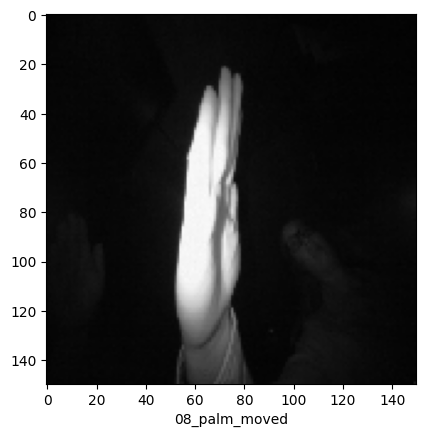

This image most likely belongs to 08_palm_moved with a 100.00 percent confidence.
1/1 [==============================] - 0s 40ms/step


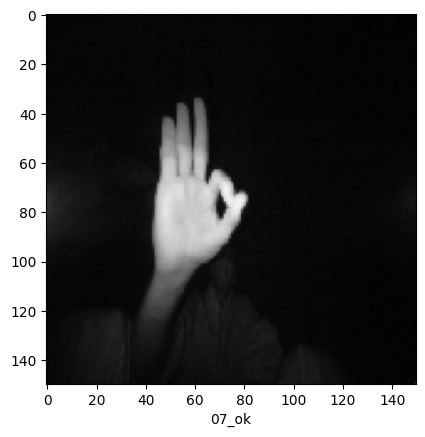

This image most likely belongs to 07_ok with a 100.00 percent confidence.
1/1 [==============================] - 0s 49ms/step


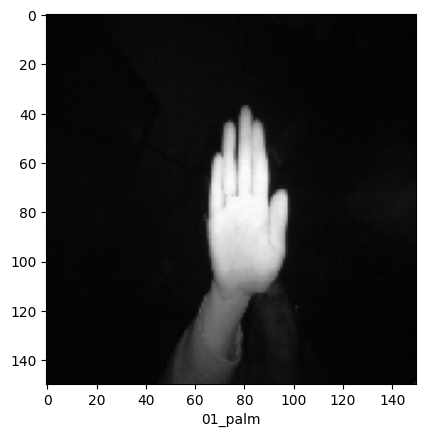

This image most likely belongs to 01_palm with a 100.00 percent confidence.
1/1 [==============================] - 0s 40ms/step


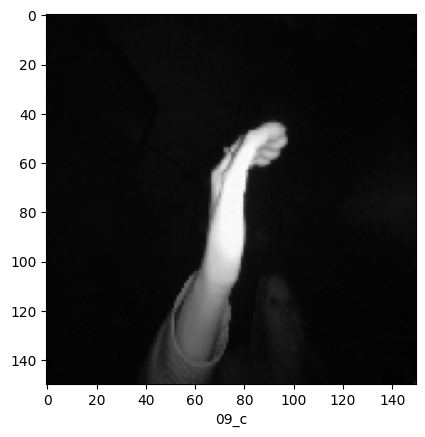

This image most likely belongs to 09_c with a 100.00 percent confidence.
1/1 [==============================] - 0s 48ms/step


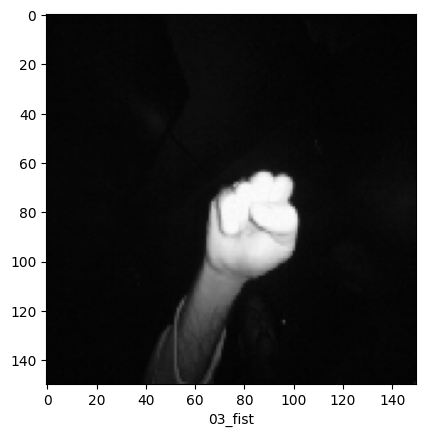

This image most likely belongs to 03_fist with a 100.00 percent confidence.
1/1 [==============================] - 0s 43ms/step


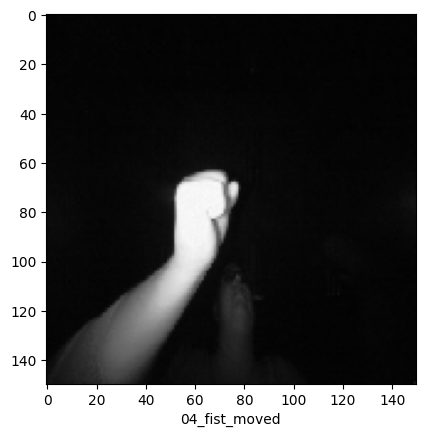

This image most likely belongs to 04_fist_moved with a 100.00 percent confidence.
1/1 [==============================] - 0s 51ms/step


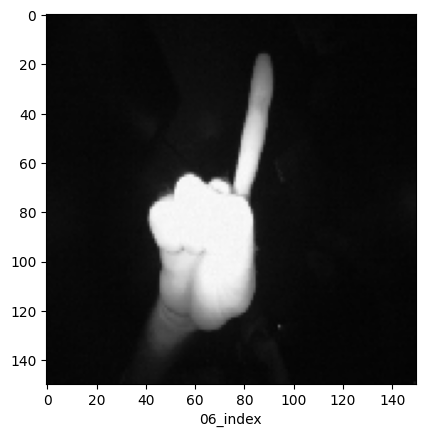

This image most likely belongs to 06_index with a 100.00 percent confidence.
1/1 [==============================] - 0s 33ms/step


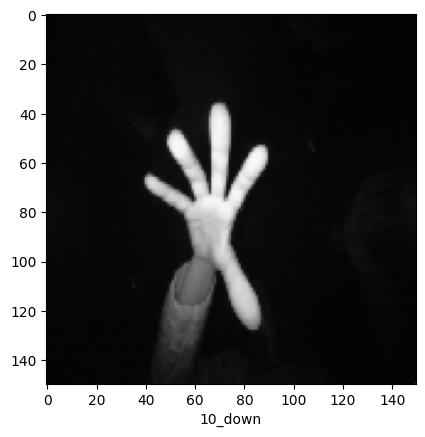

This image most likely belongs to 10_down with a 100.00 percent confidence.
1/1 [==============================] - 0s 65ms/step


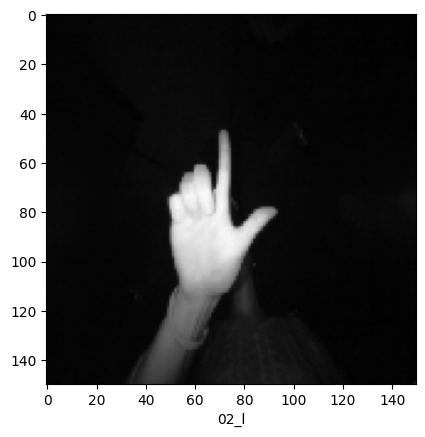

This image most likely belongs to 02_l with a 100.00 percent confidence.
1/1 [==============================] - 0s 67ms/step


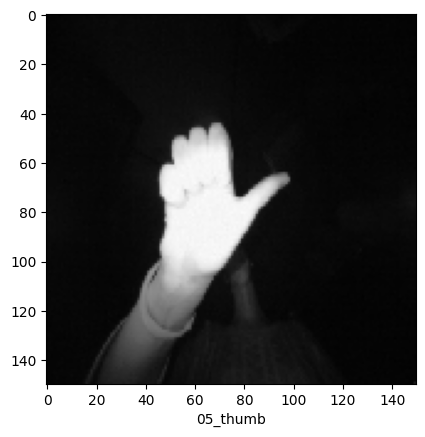

This image most likely belongs to 05_thumb with a 100.00 percent confidence.


In [44]:
for img in test_file:
    img_dir = os.path.join(destination_folder, img)
    img = tf.keras.utils.load_img(
        img_dir, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    plt.imshow(img)
    plt.xlabel(class_name[np.argmax(score)])
    plt.show()
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_name[np.argmax(score)], 100 * np.max(score))
    )
